Ignores shell warnings and preserves interactivity

In [1]:
import warnings
warnings.simplefilter('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Basic data science libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-dark')

Data Preprocessing steps

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

ML libraries

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Loading the data set

In [5]:
df = pd.read_csv('/content/trainyl.csv')

Dividing variables based on data types

In [6]:
ID_COL, TARGET_COL = 'video_id', 'views'

num_cols = ['likes', 'dislikes', 'comment_count']
cat_cols = ['category_id', 'country_code']
text_cols = ['title', 'channel_title', 'tags', 'description']
date_cols = ['publish_date']

Shape of the data set

In [7]:
df.shape

(26061, 12)

Closer look on data

In [8]:
df.head(3)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,2351.0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,74.0,314.0,Vice Ganda notices Bela Padilla's sudden chang...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,580.0


Drop the duplicates to avoid unnecessary training 

In [9]:
df.drop_duplicates()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,2351.0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,74.0,314.0,Vice Ganda notices Bela Padilla's sudden chang...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,580.0
3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10.0,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509726.0,847.0,4536.0,Hi hi hi! here's our vid on FLASHBACK's channe...,GB,82773.0
4,74074,MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,Dude Seriously,23.0,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",74311.0,69.0,161.0,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,IN,3557.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26056,73469,BURTS BEES GOODNESS GLOWS FOUNDATION WEAR TEST...,Casey Holmes,26.0,2018-01-16,"burts bees|""wear test""|""drugstore makeup""|""aff...",103852.0,88.0,856.0,Don't forget to subscribe here-- http://bit.ly...,US,7256.0
26057,45412,മമ്മൂട്ടിയെ കളിയാക്കിയ ഫെമിനിച്ചികളെ തേച്ചൊട്ട...,First Show,24.0,2017-12-17,"film news|""movie news""|""movie gossips""|""mollyw...",62070.0,53.0,219.0,മമ്മൂട്ടിയെ കളിയാക്കിയ ഫെമിനിച്ചികളെ തേച്ചൊട്ട...,IN,1468.0
26058,61555,Pyaas | SAJJAN SINGH RANGROOT | DILJIT DOSANJH...,Speed Records,10.0,2018-03-04,"punjabi songs|""punjabi bhangra""|""punjabi music...",1529753.0,1636.0,2146.0,VIVID ART HOUSE PRESENTS\n“SAJJAN SINGH RANGRO...,IN,40282.0
26059,45134,Eric will do whatever the narrator says,Vat19,24.0,2018-05-17,"vat19|""vat19 cheesy puffs""|""vat19 cheese balls...",185860.0,91.0,602.0,Giant stuffed bag of cute plush cheese snacks....,CA,4247.0


Let's the numerical variables range

In [10]:
df.describe()

,video_id,category_id,views,dislikes,comment_count,likes
count,26061.000000,26061.000000,2.606100e+04,26061.000000,26061.000000,2.606100e+04
mean,44560.500518,21.498292,3.875939e+05,539.231380,1693.145620,1.258067e+04
std,25688.103401,6.304901,1.595818e+06,3117.168779,9247.594359,5.856355e+04
min,2.000000,1.000000,7.870000e+02,0.000000,0.000000,0.000000e+00
25%,22523.000000,22.000000,6.859900e+04,53.000000,93.000000,6.830000e+02
50%,44648.000000,24.000000,1.535950e+05,134.000000,389.000000,2.541000e+03
75%,66744.000000,25.000000,3.380170e+05,348.000000,1211.000000,8.553000e+03
max,89272.000000,43.000000,1.434083e+08,217017.000000,692312.000000,3.880088e+06


Getting dummies for string variables to get numerical values on them 

In [11]:
df = pd.get_dummies(df, columns = cat_cols)

Converting numerical variables to log(Value) to reduce outlier effect and bring axis scale smaller.

In [12]:
df[num_cols + ['views']] = df[num_cols + ['views']].apply(lambda x: np.log1p(x))

Fill Null values with 0

In [13]:
df = df.fillna(0)

Converting date variable to year, month and day

In [14]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d')
df['publish_date_days_since_start'] = (df['publish_date'] - df['publish_date'].min()).dt.days

df['publish_date_day_of_week'] = df['publish_date'].dt.dayofweek
df['publish_date_year'] = df['publish_date'].dt.year
df['publish_date_month'] = df['publish_date'].dt.month

Select Top 50 description, title and tags count for ML training

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

TOP_N_WORDS = 750

vec = CountVectorizer(max_features = TOP_N_WORDS)
txt_to_ft1 = vec.fit_transform(df['description']).toarray()
txt_to_ft2 = vec.fit_transform(df['tags']).toarray()
txt_to_ft3 = vec.fit_transform(df['title']).toarray()



In [16]:
e = 'description'
txt_fts_name1 = [e + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
df[txt_fts_name1] = txt_to_ft1

a = 'tags'
txt_fts_name2 = [a + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
df[txt_fts_name2] = txt_to_ft2

z = 'title'
txt_fts_name3 = [z + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
df[txt_fts_name3] = txt_to_ft3

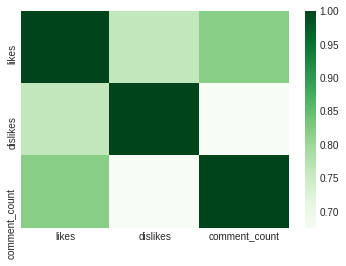

In [17]:
_ = sns.heatmap(df[num_cols].corr(),cmap='Greens')

Neglecting ID and target

In [18]:
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]

Splitting data into validation for performance 

In [19]:
trn, val = train_test_split(df, test_size=0.3, random_state = 1)

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

ML performance RMSE 

In [20]:
from sklearn.metrics import mean_squared_error

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

Linear Regression using only numerical columns

In [21]:
clf = LinearRegression()

_ = clf.fit(X_trn[num_cols], y_trn)

preds_val = clf.predict(X_val[num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 744.3870253291651


In [22]:
features = [c for c in X_trn.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in text_cols + date_cols]

Linear Regression training for numerical, categorical, date and text columns

In [23]:
cat_num_cols

['dislikes',
 'comment_count',
 'likes',
 'category_id_1.0',
 'category_id_2.0',
 'category_id_10.0',
 'category_id_15.0',
 'category_id_17.0',
 'category_id_19.0',
 'category_id_20.0',
 'category_id_22.0',
 'category_id_23.0',
 'category_id_24.0',
 'category_id_25.0',
 'category_id_26.0',
 'category_id_27.0',
 'category_id_28.0',
 'category_id_29.0',
 'category_id_30.0',
 'category_id_43.0',
 'country_code_CA',
 'country_code_GB',
 'country_code_IN',
 'country_code_US',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_date_year',
 'publish_date_month',
 'description_word_0_count',
 'description_word_1_count',
 'description_word_2_count',
 'description_word_3_count',
 'description_word_4_count',
 'description_word_5_count',
 'description_word_6_count',
 'description_word_7_count',
 'description_word_8_count',
 'description_word_9_count',
 'description_word_10_count',
 'description_word_11_count',
 'description_word_12_count',
 'description_word_13_count',
 'desc

In [24]:
clf = LinearRegression()

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 650.0452072359827


Tried using Random Search to get best parameters. Unfortunately the training took more than an hour. (Please skip this section)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}

clf = RandomizedSearchCV(RandomForestRegressor(),
                         hyperparam_combs,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

search = clf.fit(df[cat_num_cols], df[TARGET_COL])

search.best_params_

Selecting maximum parameters to save training time. 

In [25]:
best_params = {'max_depth': 12,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'random_state': 1,
 'min_samples_split': 30}

clf = RandomForestRegressor(**best_params)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 588.1135462877477


The closer the RMSE value to zero the better the performance. In this ML model the data in millions range knowing that we did best. 